 Marine VAN RENTERGHEM (31621700)  
# LMAPR1492 Physique des matériaux : Tâche 8
Ce Notebook permet de télécharger la structure de bande correspondant au materiau mp-9035 et d'analyser celle-ci. 

Tout d'abord, ce Notebook présentera une analyse de la bande interdite. 

Ensuite, celui-ci présentera la direction dans laquelle la dernière (première) bande de
valence (conduction) présente le plus et le moins de dispersion.

Enfin, ce Notebook finira par le calcul de la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique.

## 1.Télécharger la structure de bande du matériau mp-9035

In [1]:
#Code permettant de télécharger la structure de bande du NaLuS2 (mp-9035) 
from pymatgen.ext.matproj import MPRester
with MPRester("lTqZwmbprAgWB64c") as m:

    # Bandstructure for material id
    structure = m.get_structure_by_material_id("mp-9035")
    bandstructure = m.get_bandstructure_by_material_id("mp-9035")

## 2. Analyse de la structure de bande

Ci-dessous est représentée la structure de bande du $NaLuS_2$. Les ordonnées ont été normalisées de telle sorte que le point 0 corresponde à l'énergie de Fermi qui vaut 2,249 eV.

Energie de Fermi :  2.24889982


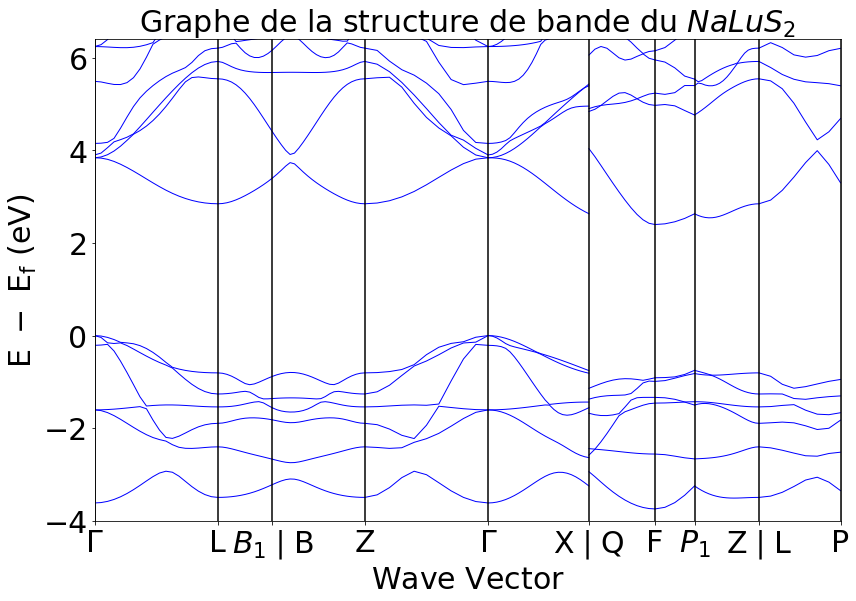

In [9]:
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.bandstructure import BandStructure
import numpy as np
import matplotlib.pyplot as plt

BS=BSPlotter(bandstructure)
BSdata=BS.bs_plot_data()
print("Energie de Fermi : ",bandstructure.efermi)
BS.get_plot()
plt.title(r"Graphe de la structure de bande du $NaLuS_2$",fontsize=30)
plt.show()

### 2.1 Bande interdite

In [3]:
print("Caractéristiques de la bande interdite: ",BSdata.get('band_gap'))
print("Est-ce que le matériau est un métal? ",BSdata.get('is_metal'))

Caractéristiques de la bande interdite:  Indirect \Gamma-F bandgap = 2.3992999999999998
Est-ce que le matériau est un métal?  False


La bande interdite du $NaLuS_2$ est indirecte et vaut 2,399 eV selon la direction $\Gamma\ - \ F$ de la zone de Brillouin du cristal. Par la taille de la bande interdite, nous pouvons définir le matériau comme un isolant électrique car $\epsilon_g>2$ eV (Comme vu dans la deuxième partie du cours de Physique des Matériaux). Les électrons restent donc dans la bande de valence qui est remplie. La bande interdite étant indirecte, il y a une difficulté supplémentaire au passage des électrons. Ce matériau n'est pas un métallique car l'énergie de Fermi est inférieur à 5 eV.

### 2.2 Directions présentant le plus et le moins de dispersion

Trouvons la direction dans laquelle la dernière bande de valence présente le plus et le moins de dispersion et la direction dans laquelle la première bande de conduction présente le plus et le moins de dispersion. 

Pour ce faire, déterminons quelle est la dernière bande de valence et la première bande de conduction. Ensuite, calculons les pentes de la dernière bande de valence et de la première bande de conduction pour chaque branche. Enfin, nous trouvons les directions qui présentent le plus de dispersion (plus grande pente) et le moins de dispersion (plus petite pente).

In [4]:
#Trouvons la dernière bande de valence
for i in range(len(BSdata.get('energy')[0].get('1'))): 
    if np.max(BSdata.get('energy')[0].get('1')[i][:])>=0:
        bandeval=i
        break
print("Dernière bande de valence : ",bandeval)
print(BSdata.get('energy')[0].get('1')[bandeval][:])
print()
print("Première bande de conduction : ",bandeval+1)
print(BSdata.get('energy')[0].get('1')[bandeval+1][:])

Dernière bande de valence :  13
[0.0, -0.010099999999999998, -0.03950000000000031, -0.08580000000000032, -0.14580000000000037, -0.15820000000000034, -0.17680000000000007, -0.21720000000000028, -0.28000000000000025, -0.36370000000000013, -0.4651000000000003, -0.5796000000000001, -0.6853000000000002, -0.7234000000000003, -0.7527000000000001, -0.7742000000000002, -0.7892000000000001, -0.7989000000000002, -0.8042000000000002, -0.8060000000000003]

Première bande de conduction :  14
[3.8417, 3.8348999999999998, 3.8082999999999996, 3.7628, 3.7023999999999995, 3.6313999999999997, 3.5529999999999995, 3.4697999999999998, 3.3844, 3.2994999999999997, 3.2178999999999998, 3.1417999999999995, 3.0730999999999997, 3.0128999999999997, 2.962, 2.9205, 2.8883999999999994, 2.8657, 2.8521999999999994, 2.8477]


La dernière bande de valence est la bande n° 13 tandis que la première bande de conduction est la bande n°14. En effet, lorsqu'on regarde les énergies renvoyées pour ces bandes là pour la branche $\Gamma-L$, on a bien une bande de valence présentant une énergie $E-E_f=0$ et une bande de conduction présentant une énergie $E-E_f$ supérieure à l'écart de la bande interdite.

In [5]:
"""Calcul des pentes"""

directions,indices=np.unique(BS.get_ticks().get('label'),return_index=True)
indices=np.sort(indices)
indices=np.insert(indices,4,6)
N=len(indices)

#Calcul de delta y
deltaenergieval=np.zeros(N-1)
deltaenergiecond=np.zeros(N-1)
for l in range(N-1): 
    deltaenergieval[l]=BSdata.get('energy')[l].get('1')[bandeval][-1]-BSdata.get('energy')[l].get('1')[bandeval][0]
    deltaenergiecond[l]=BSdata.get('energy')[l].get('1')[bandeval+1][-1]-BSdata.get('energy')[l].get('1')[bandeval+1][0]
    
#Calcul de delta x
deltadist=np.zeros(N-1)
deltadist=np.zeros(N-1)
l=0
for l in range(0,N-1):
    deltadist[l]=BS.get_ticks().get('distance')[indices[l+1]]-BS.get_ticks().get('distance')[indices[l]]

#Pente= delta y / delta x
penteval=deltaenergieval/deltadist
pentecond=deltaenergiecond/deltadist

print("Dispersion maximale de la dernière bande de valence : ", np.max(np.abs(penteval)), BS.get_ticks().get('label')[indices[np.argmax(np.abs(penteval))]],BS.get_ticks().get('label')[indices[np.argmax(np.abs(penteval))+1]])
print("Dispersion minimale de la dernière bande de valence : ", np.min(np.abs(penteval)), BS.get_ticks().get('label')[indices[np.argmin(np.abs(penteval))]],BS.get_ticks().get('label')[indices[np.argmin(np.abs(penteval))+1]])
print("Dispersion maximale de la première bande de conduction : ", np.max(np.abs(pentecond)), BS.get_ticks().get('label')[indices[np.argmax(np.abs(pentecond))]],BS.get_ticks().get('label')[indices[np.argmax(np.abs(pentecond))+1]])
print("Dispersion minimale de la première bande de conduction : ", np.min(np.abs(pentecond)), BS.get_ticks().get('label')[indices[np.argmin(np.abs(pentecond))]],BS.get_ticks().get('label')[indices[np.argmin(np.abs(pentecond))+1]])

Dispersion maximale de la dernière bande de valence :  0.9814848062182184 $\Gamma$ X$\mid$Q
Dispersion minimale de la dernière bande de valence :  0.10553311047928803 $B_1$$\mid$B Z
Dispersion maximale de la première bande de conduction :  3.242833090512374 X$\mid$Q F
Dispersion minimale de la première bande de conduction :  0.4401466628168706 $P_1$ Z$\mid$L


Pour la dernière bande de valence, nous trouvons donc une dispersion maximale dans la direction $\Gamma-X\mid Q$ avec une pente de 0.98 et une dispersion minimale dans la direction $B_1 \mid B -Z$  avec une pente de 0.11. 

Pour la première bande de conduction, nous trouvons une dispersion maximale dans la direction $X\mid Q-F$ avec une pente de 3.24 et une dispersion minimale dans la direction $P_1-Z \mid L$  avec une pente de 0.44.

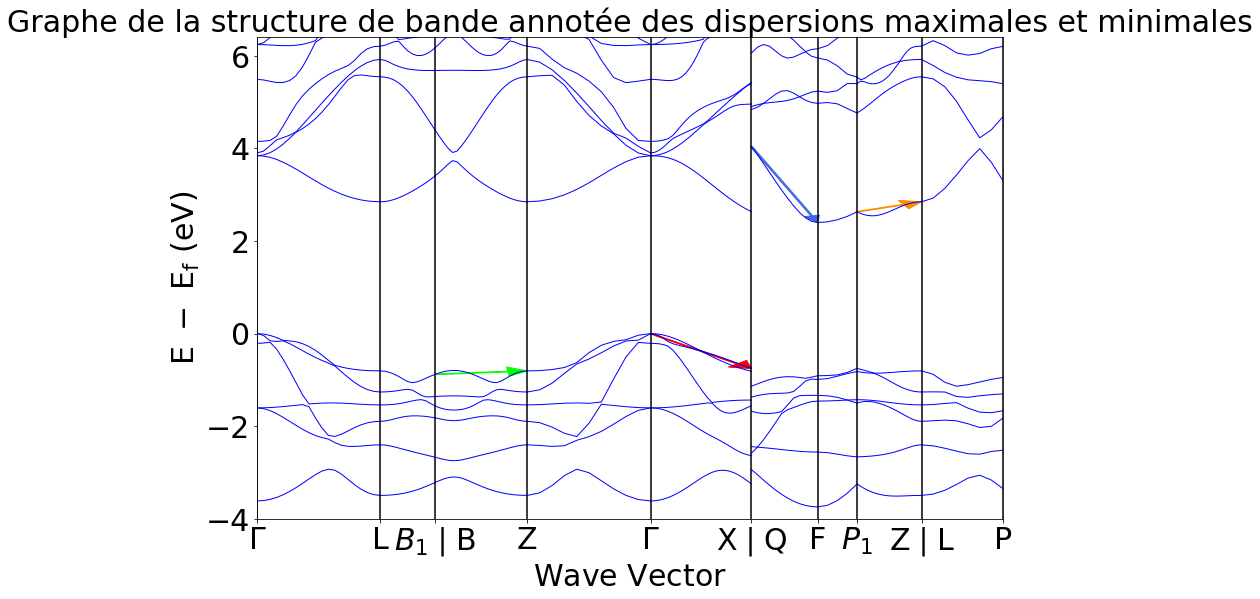

In [6]:
BS.get_plot()

plt.arrow(BS.get_ticks().get('distance')[indices[np.argmax(np.abs(penteval))]], BSdata.get('energy')[np.argmax(np.abs(penteval))].get('1')[bandeval][0], deltadist[np.argmax(np.abs(penteval))], penteval[np.argmax(np.abs(penteval))]*deltadist[np.argmax(np.abs(penteval))],width = 0.015, head_width = 0.2, head_length = 0.15, length_includes_head= True,color='red',label="Dispersion maximale de la dernière bande de valence")

plt.arrow(BS.get_ticks().get('distance')[indices[np.argmin(np.abs(penteval))]], BSdata.get('energy')[np.argmin(np.abs(penteval))].get('1')[bandeval][0], deltadist[np.argmin(np.abs(penteval))], penteval[np.argmin(np.abs(penteval))]*deltadist[np.argmin(np.abs(penteval))],width = 0.015, head_width = 0.2, head_length = 0.15, length_includes_head= True,color='lime',label="Dispersion minimale de la dernière bande de valence")

plt.arrow(BS.get_ticks().get('distance')[indices[np.argmax(np.abs(pentecond))]], BSdata.get('energy')[np.argmax(np.abs(pentecond))].get('1')[bandeval+1][0], deltadist[np.argmax(np.abs(pentecond))], pentecond[np.argmax(np.abs(pentecond))]*deltadist[np.argmax(np.abs(pentecond))],width = 0.015, head_width = 0.12, head_length = 0.15, length_includes_head= True,color='royalblue',label="Dispersion maximale de la première bande de conduction")

plt.arrow(BS.get_ticks().get('distance')[indices[np.argmin(np.abs(pentecond))]], BSdata.get('energy')[np.argmin(np.abs(pentecond))].get('1')[bandeval+1][0], deltadist[np.argmin(np.abs(pentecond))], pentecond[np.argmin(np.abs(pentecond))]*deltadist[np.argmin(np.abs(pentecond))],width = 0.015, head_width = 0.2, head_length = 0.15, length_includes_head= True,color='darkorange',label="Dispersion minimale de la première bande de conduction")

plt.title(r"Graphe de la structure de bande du $NaLuS_2$ annotée des dispersions maximales et minimales",fontsize=30)

plt.show()

Trouvez ci-dessus le graphe de la structure de bande du $NaLuS_2$ annotée des flèches de dispersion maximale et minimale. 
- **La flèche rouge** : Dispersion maximale de la dernière bande de valence
- **La flèche verte** : Dispersion minimale de la dernière bande de valence
- **La flèche bleue** : Dispersion maximale de la première bande de conduction
- **La flèche orange** : Dispersion minimale de la première bande de conduction

### 2.3 Masse effective

La masse effective $m^*$ permet d'établir une relation entre l'accélération d'un électron et la force extérieure. On peut ainsi définir un électron comme une particule libre dont la masse varie. La masse effective est donc définie commme : 
$$m^* \frac{dv_k}{dt}=F_{ext}$$
On peut réécrire la masse effective comme : 
$$m^*=\frac{\hbar^2}{\frac{\partial^2 E}{\partial k^2}}$$
Supposons une dispersion parabolique, cela revient à appliquer une parabole au sommet de la bande considérée. Cette parabole a pour équation $E=ak^2+bk+c$. Pour déterminer les coefficients $a,b$ et $c$, nous considérons le sommet ainsi que ses points voisins et y appliquons la fonction polyfit qui va approximer les points considérés par une parabole.

La dérivée seconde $\frac{\partial^2 E}{\partial k^2}$ est donc la dérivée seconde de l'équation de la parabole obtenue et ceci nous donne : 
$$\frac{\partial^2 E}{\partial k^2}=2a$$
Comme cette dérivée partielle est exprimée en $[eV/\overset{\circ}{A^2}]$, nous devons changer ses unités dans le système MKSA afin d'obtenir des $[J/m^2]$.

Plus la courbure de la parabole est grande, plus la masse effective sera faible.

Faisons le calcul de la masse effective pour le sommet de la dernière bande de valence et pour la base de la première bande de conduction. La masse effective trouvée sera négative pour la dernière bande de valence car la concavité est tournée vers le bas (a<0).


Dernière bande de valence
a : -3.5877788579263132
b : 21.620726494352866
c : -32.57329620000278
Masse effective de la dernière bande de valence -9.67353826744134e-31  kg
Masse effective relative de la dernière bande de valence m*= -1.0619311618316947 m_e

Première bande de conduction
a : 5.476251966667402
b : -47.56025105890664
c : 105.65279060171513
Masse effective de la première bande de conduction 6.337640468064143e-31  kg
Masse effective relative de la première bande de conduction m*= 0.6957266017311212 m_e


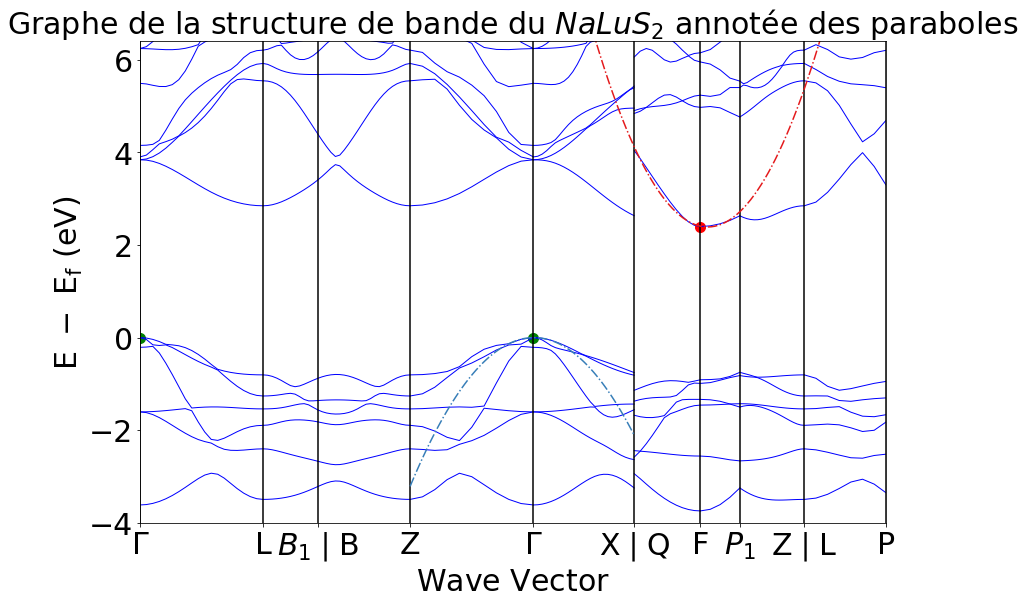

In [10]:
import scipy.constants as const
melec=9.10938356*1e-31
print('Dernière bande de valence')
#Approximation du sommet de la courbe de la dernière bande de valence par une parabole
yval= np.append( BSdata.get('energy')[3].get('1')[bandeval][8:] , BSdata.get('energy')[4].get('1')[bandeval][:3] )
xval  = np.append( BSdata.get('distances')[3][8:] , BSdata.get('distances')[4][:3] )      
polval = np.polyfit(xval,yval,2)                       
xlinval=np.linspace(BS.get_ticks().get('distance')[indices[3]],BS.get_ticks().get('distance')[indices[5]],100)  
ypltval = np.polyval(polval,xlinval)
print('a :',polval[0])
print('b :',polval[1])
print('c :',polval[2])

#Calcul de la masse effective de la dernière bande de valence
devval=2*polval[0]*1.60218*1e-19*1e-20
mval=(const.hbar)**2/devval
print('Masse effective de la dernière bande de valence',mval," kg")
print('Masse effective relative de la dernière bande de valence m*=', mval/melec, "m_e")

print()
print('Première bande de conduction')

#Approximation du sommet de la courbe de la première bande de conduction par une parabole
ycond= np.append( BSdata.get('energy')[5].get('1')[bandeval+1][8:] , BSdata.get('energy')[6].get('1')[bandeval+1][:4] )
xcond  = np.append( BSdata.get('distances')[5][8:] , BSdata.get('distances')[6][:4] )
polcond = np.polyfit(xcond,ycond,2)                       
xlinc=np.linspace(BS.get_ticks().get('distance')[indices[4]],BS.get_ticks().get('distance')[indices[9]],100)  
ypltcond = np.polyval(polcond,xlinc)
print('a :',polcond[0])
print('b :',polcond[1])
print('c :',polcond[2])

#Calcul de la masse effective de la première bande de conduction
devcond=2*polcond[0]*1.60218*1e-19*1e-20
mcond=(const.hbar)**2/devcond
print('Masse effective de la première bande de conduction',mcond," kg")
print('Masse effective relative de la première bande de conduction m*=', mcond/melec, "m_e")

#Graphe avec paraboles et optimum
BS.get_plot()
plt.scatter(BSdata.get('cbm')[0][0],BSdata.get('cbm')[0][1],color='red',s=100)
plt.scatter(BSdata.get('vbm')[0][0],BSdata.get('vbm')[0][1],color='green',s=100)
plt.scatter(BSdata.get('vbm')[1][0],BSdata.get('vbm')[1][1],color='green',s=100)
plt.plot(xlinc,ypltcond,'-.')
plt.plot(xlinval,ypltval,'-.')
plt.title(r"Graphe de la structure de bande du $NaLuS_2$ annotée des paraboles",fontsize=30)
plt.show()

### 2.3.1 Masse effective au sommet de la dernière bande de valence

La dernière bande de valence possède deux maximums (représentés en vert sur le graphe ci-dessus). Choisissons de déterminer la masse effective du sommet se trouvant en $(\Gamma, 0)$ entre la branche de direction $Z-\Gamma$ et la branche de direction $\Gamma-X\mid Q$. Par la fonction polyfit, nous trouvons les coefficient $a,b$ et $c$ de la parabole :

$a= -3.588$

$b= 21.621$

$c= -32.573$

Ci-dessus est représentée en vert la parabole dessinée avec ces coefficients. Celle-ci approxime bien les points autour du sommet.

A partir de la valeur de $a$, on trouve une masse effective de $m^*=-9.67\cdot 10^{-31}$  kg. Sachant que la masse d'un électron est de $-9.109\cdot 10^{-31}$, on a donc $m^*=-1.061\ m_{e^-}$. On a effectivement une masse effective négative ce qui traduit une accélération de sens opposé à la force appliquée. 

### 2.3.2 Masse effective à la base de la première bande de conduction

La première bande de conduction possède un seul minimum (représenté en rouge sur le graphe ci-dessus). Déterminons donc la masse effective de la base se trouvant en $(F,2.399)$ (le graphe possède toujours $E-E_f$ comme ordonnées).   Par la fonction polyfit, nous trouvons les coefficient $a,b$ et $c$ :

$a= 5.476$

$b= -47.560$

$c= 105.653$

Ci-dessus est représentée en rouge la parabole dessinée avec ces coefficients. Celle-ci approxime bien les points autour de la base.

A partir de la valeur de $a$, on trouve une masse effective de $m^*=6.338\cdot 10^{-31}$  kg. Sachant que la masse d'un électron est de $-9.109\cdot 10^{-31}$, on a donc $m^*=0.696\ m_{e^-}$.

## 3. Références

 [1]« pymatgen.analysis.diffraction.xrd module — pymatgen 2020.3.13 documentation ». [En ligne]. Disponible sur: https://pymatgen.org/pymatgen.electronic_structure.bandstructure.html. [Consulté le: 29-mars-2020].
 
 [2] « pymatgen.electronic_structure.bandstructure module — pymatgen 2020.3.13 documentation ». [En ligne]. Disponible sur: https://pymatgen.org/pymatgen.electronic_structure.plotter.html. [Consulté le: 30-mars-2020].
